In this project, we'll see how stockprices changes over time using Panda, Seaborn and Matplotlib to visualize the time-series data.

Here are a few questions that we want to answer in this project:

* How did the stock change over time?
* Is the stock worth investing? i.e what are their returns, how do they compare with other stocks and how risky is this particular stock?
* How much value are at risk if we were to invest?

In [1]:
#To handle floats in Python 2
from __future__ import division

import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from pandas_datareader import DataReader
from datetime import datetime

We'll be analyzing the big 4 Tech companies' stock movement throughout the 5 years leading to today

In [2]:
#We're gonna analyze the big 4 tech companies + Apple
comp_list = ['AAPL','GOOG','MSFT','AMZN', 'NFLX']

In [3]:
#Setting the end date to today
end_time = datetime.now()

#Start date set to 2 year back
start_time = datetime(end_time.year-2,end_time.month,end_time.day)

In [4]:
#We'll use Yahoo Stock to acquire the data
for stock in comp_list:
    globals()[stock] = DataReader(stock,'yahoo',start_time,end_time)

Now, let's observe the data for abit

In [5]:
NFLX.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-10-05,194.490005,184.490005,185.649994,194.389999,19412700,194.389999
2017-10-06,198.919998,192.050003,194.300003,198.020004,15348400,198.020004
2017-10-09,199.399994,196.559998,199.100006,196.869995,6971700,196.869995
2017-10-10,198.300003,192.100006,197.850006,195.080002,6233800,195.080002
2017-10-11,196.220001,193.809998,195.570007,194.949997,6450200,194.949997


In [6]:
NFLX.describe()

,High,Low,Open,Close,Volume,Adj Close
count,503.000000,503.000000,503.000000,503.000000,5.030000e+02,503.000000
mean,316.416649,306.343101,311.695647,311.554016,9.619432e+06,311.554016
std,60.620418,59.219221,60.085690,59.865395,5.393935e+06,59.865395
min,186.479996,178.380005,183.380005,184.039993,2.160500e+06,184.039993
25%,283.610001,270.394989,277.320007,278.330002,5.854900e+06,278.330002
50%,331.170013,319.000000,325.899994,325.220001,8.225300e+06,325.220001
75%,363.869995,353.729996,359.000000,359.190002,1.197115e+07,359.190002
max,423.209991,413.079987,421.380005,418.970001,5.841040e+07,418.970001


In [7]:
NFLX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503 entries, 2017-10-05 to 2019-10-04
Data columns (total 6 columns):
High         503 non-null float64
Low          503 non-null float64
Open         503 non-null float64
Close        503 non-null float64
Volume       503 non-null int64
Adj Close    503 non-null float64
dtypes: float64(5), int64(1)
memory usage: 27.5 KB


#### How did the stock change over time?
Now, we'll try to answer some the questions we set out for ourselves.
First, let's plot how the stock changes over time

Text(0.5, 1.0, "Stock's adjusted closing price over time")

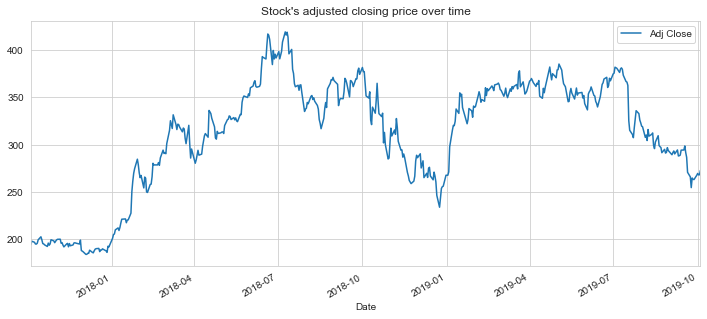

In [8]:
NFLX['Adj Close'].plot(legend=True,figsize=(12,5)).set_title('Stock\'s adjusted closing price over time')

Text(0.5, 1.0, 'Total Volume Traded over time')

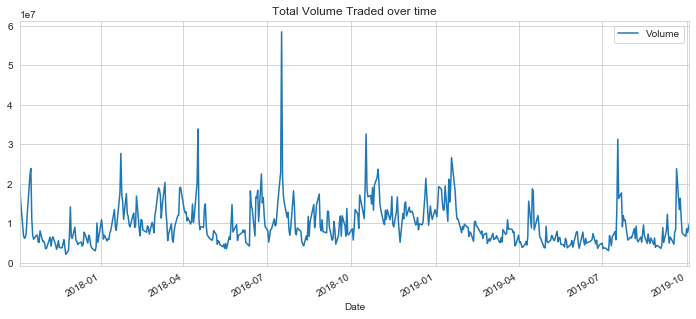

In [9]:
NFLX['Volume'].plot(legend=True,figsize=(12,5)).set_title('Total Volume Traded over time')

We'll also study the moving average for period of 10, 30 (1 month), 180 (approx half a year), 365 (1 year).

Moving averages are smoother and are not perturbed by daily fluctuations. Hence, we can observe that the trend more clearly using the moving average.

In [10]:
ma_day = [10,30,180, 365]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    NFLX[column_name] = NFLX['Adj Close'].rolling(window=ma,center=False).mean()

In [11]:
NFLX.tail()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 30 days,MA for 180 days,MA for 365 days
Date,,,,,,,,,,
2019-09-30,268.880005,262.779999,264.000000,267.619995,6727200,267.619995,272.678000,286.725665,341.370888,338.386137
2019-10-01,272.200012,264.029999,267.350006,269.579987,8650300,269.579987,269.775998,285.398998,341.018888,338.213205
2019-10-02,269.350006,262.190002,263.609985,268.029999,7659100,268.029999,267.422998,284.366998,340.537721,338.049534
2019-10-03,268.839996,257.010010,267.779999,268.149994,8951000,268.149994,265.577997,283.378332,340.075277,337.911068
2019-10-04,275.484589,266.470001,268.200012,272.790009,9992774,272.790009,265.781998,282.573665,339.628610,337.817287


Text(0.5, 1.0, 'Moving averages for 10,30, 180, 365 days')

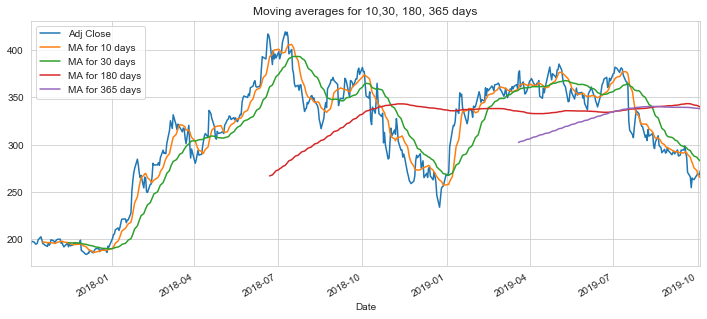

In [12]:
NFLX[['Adj Close','MA for 10 days','MA for 30 days','MA for 180 days', 'MA for 365 days']].plot(subplots=False,figsize=(12,5)).set_title('Moving averages for 10,30, 180, 365 days')

Netflix in general are on rising trend, which coincides with the tech boom in the past few years. From my understanding, there are a heavy influx of hot money into the stock market as low interest rates made bonds and other financial instruments reliant on the interest rates, less profitable.

#### Is this stock worth investing?
Now, we'll attempt to answer our second question. First, we'll see what is the daily return of the stock

In [13]:
NFLX['Daily Return'] = NFLX['Adj Close'].pct_change()

Text(0.5, 1.0, 'Daily returns in the period of 2 years')

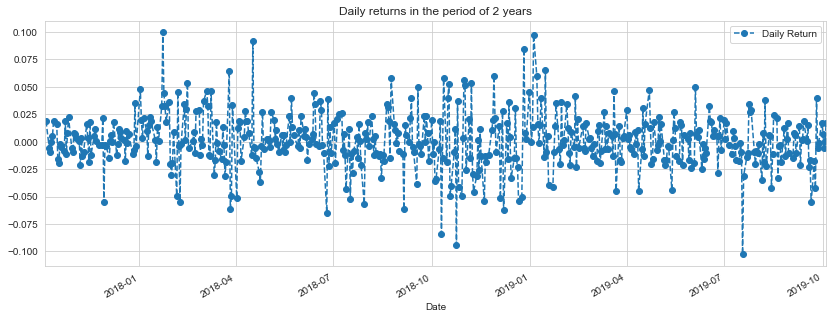

In [14]:
NFLX['Daily Return'].plot(figsize=(14,5),legend=True,linestyle='--',marker='o').set_title('Daily returns in the period of 2 years')

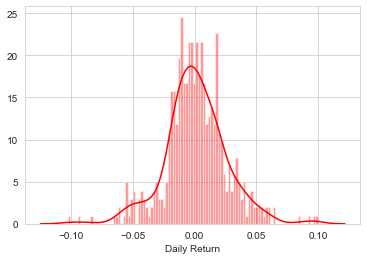

In [15]:
sns.distplot(NFLX['Daily Return'].dropna(),bins=100,color='red')

We'll now compare it with other tech stocks

In [16]:
closeP_df = DataReader(comp_list,'yahoo',start_time,end_time)['Adj Close']
closeP_df.tail()

Symbols,AAPL,AMZN,GOOG,MSFT,NFLX
Date,,,,,
2019-09-30,223.970001,1735.910034,1219.000000,139.029999,267.619995
2019-10-01,224.589996,1735.650024,1205.099976,137.070007,269.579987
2019-10-02,218.960007,1713.229980,1176.630005,134.649994,268.029999
2019-10-03,220.820007,1724.420044,1187.829956,136.279999,268.149994
2019-10-04,227.009995,1739.650024,1209.000000,138.119995,272.790009


In [17]:
ret_df = closeP_df.pct_change()
ret_df.tail()

Symbols,AAPL,AMZN,GOOG,MSFT,NFLX
Date,,,,,
2019-09-30,0.023535,0.006062,-0.004971,0.009439,0.017257
2019-10-01,0.002768,-0.000150,-0.011403,-0.014098,0.007324
2019-10-02,-0.025068,-0.012917,-0.023625,-0.017655,-0.005750
2019-10-03,0.008495,0.006532,0.009519,0.012105,0.000448
2019-10-04,0.028032,0.008832,0.017822,0.013502,0.017304


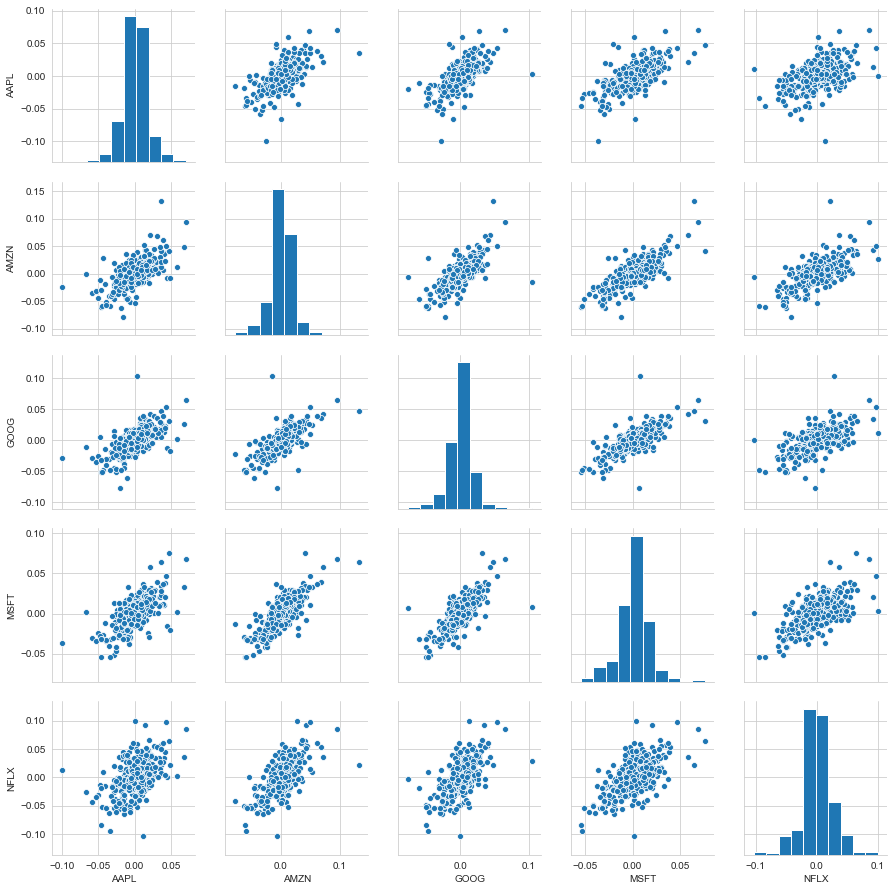

In [18]:
sns.pairplot(ret_df.dropna())

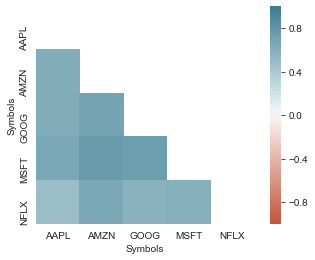

In [19]:
#Generate the correlation matrix
corr= ret_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


ax = sns.heatmap(
    corr, 
    mask = mask,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

It's interesting to note that the stocks seems to all be positively related. For Netflix, in particular, AMZN seems to be the most closely related, though still a moderate corellation. 

Now, let's study how risky these stocks. 
Defining risk in stock market is a difficult. Here's we'll attempt to quantify risk by comparing the expected return (which we define as the mean of daily returns) with the standard deviation of the daily return.

In [20]:
ret = ret_df.dropna()

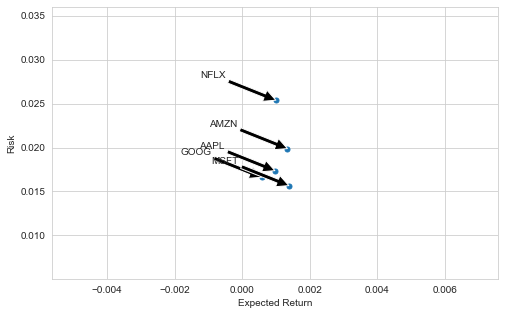

In [21]:
plt.figure(figsize=(8,5))
plt.scatter(ret.mean(),ret.std(),s=25)
plt.xlabel('Expected Return')
plt.ylabel('Risk')


#Add annotation for better viewing
for label,x,y in zip(ret.columns,ret.mean(),ret.std()):
    plt.annotate(
        label,
        xy=(x,y),xytext=(-50,20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops=dict(facecolor='black')
    )

The ideal stock is one with high returns and low risk. It seems that Netflix is a high risk with moderate returns and is arguably the worst performer out of these 5 stocks. The best stock to invest seems to be Microsoft, Apple and Google.

#### How much value are at risk if we were to invest?
There are a few ways we can assess this. The two main ways of doing it, according to http://faculty.etsu.edu/trainor/FNCE%203300/Monte%20Carlo.doc, is by using the 'Bootstrap method' and Monte Carlo Method, both of which try to determine current outcome by stimulating future paths, but Monte Carlo creates a theoretical distribution based on some provided parameter, while Bootstrap uses the underlying data given. 

##### Bootstrap method

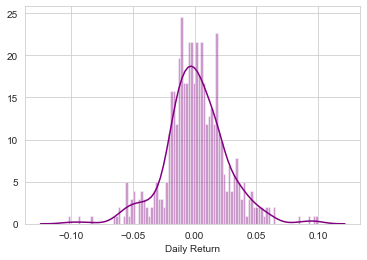

In [22]:
sns.distplot(NFLX['Daily Return'].dropna(),bins=100,color='purple')

In [23]:
ret.head()

Symbols,AAPL,AMZN,GOOG,MSFT,NFLX
Date,,,,,
2017-10-06,-0.000579,0.008900,0.009207,0.000395,0.018674
2017-10-09,0.003477,0.001425,-0.001931,0.003816,-0.005808
2017-10-10,0.000385,-0.003824,-0.004504,0.000000,-0.009092
2017-10-11,0.004169,0.007901,0.017119,0.001704,-0.000666
2017-10-12,-0.003513,0.005960,-0.001435,0.009160,0.004668


In [24]:
#Using Pandas built in qualtile method
ret['NFLX'].quantile(0.05)

-0.04279542551635327

The 0.05 empirical quantile of daily returns is at -0.009. This means that with 95% confidence, the worst daily loss will not exceed 4.28%. In othewords, a terrible investment.

#### Monte Carlo Method
Now, let's try to predict future performance using the Monte Carlo Method.

In [25]:
days = 365

#delta t
dt = 1/365

mu = ret.mean()['NFLX']

sigma = ret.std()['NFLX']

In [26]:
#Got this code from Stackoverflow
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        #Shock and drift formulas taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        #New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price

In [27]:
NFLX.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 30 days,MA for 180 days,MA for 365 days,Daily Return
Date,,,,,,,,,,,
2017-10-05,194.490005,184.490005,185.649994,194.389999,19412700,194.389999,NaN,NaN,NaN,NaN,NaN
2017-10-06,198.919998,192.050003,194.300003,198.020004,15348400,198.020004,NaN,NaN,NaN,NaN,0.018674
2017-10-09,199.399994,196.559998,199.100006,196.869995,6971700,196.869995,NaN,NaN,NaN,NaN,-0.005808
2017-10-10,198.300003,192.100006,197.850006,195.080002,6233800,195.080002,NaN,NaN,NaN,NaN,-0.009092
2017-10-11,196.220001,193.809998,195.570007,194.949997,6450200,194.949997,NaN,NaN,NaN,NaN,-0.000666


Text(0.5, 1.0, 'Monte Carlo Analysis for Netflix')

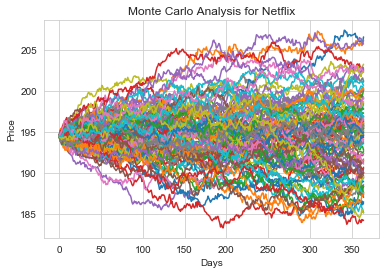

In [28]:
#We'll now do 100 simulations of 100 theoetical future paths, and determine the most likely outcome
start_price = 194.490005 

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Netflix')

In [29]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Netflix Stock after 365 days')

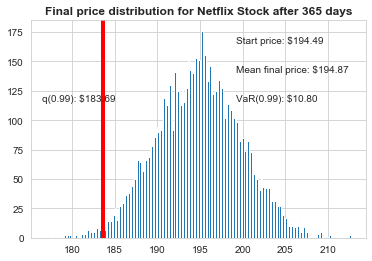

In [30]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

plt.figtext(0.6,0.7,"Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price -q,))

plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Netflix Stock after %s days" %days, weight='bold')

We can see that the price for Netflix is relatively stable i.e it has a mean price of $194.84 after 10,000 run -- an increase from its initial price of $194.49.

The red line indicates the value of stock at risk at the desired confidence interval. For every stock, we'd be risking USD10.75, 99% of the time.